In [10]:
#Importing the required libraries 
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#Opening the path of the csv file
df=pd.read_csv("/Users/akhil/Projects/TemperaturePredictionModelMumbai/Mumbai.csv")
print(df.describe())
#Filling the null values with nearby values
df.fillna(method='ffill', inplace=True)
df.tmax.fillna(method='bfill', inplace=True)

               tavg         tmin         tmax         prcp
count  11883.000000  9440.000000  9987.000000  7213.000000
mean      27.762509    22.618549    32.315040    10.942007
std        2.189138     3.803629     2.234577    29.808576
min       17.700000     8.500000    22.300000     0.000000
25%       26.600000    19.800000    30.900000     0.000000
50%       28.100000    23.700000    32.400000     0.000000
75%       29.300000    25.400000    33.900000     7.100000
max       33.700000    30.400000    41.300000   461.000000


In [11]:
#Plotting the maximum temperatures 
figure = px.line(df, x="time", 
                 y="tmax", 
                 title='Maximum Temperatures in Mumbai')
figure.show()

In [12]:
#Plotting the Minimum temperatures 
figure = px.line(df, x="time", 
                 y="tmin", 
                 title='Minimum Temperature in Mumbai')
figure.show()

In [13]:
#Plotting the Average temperatures 
figure = px.line(df, x="time", 
                 y="tavg", 
                 title='Mean Temperature in Mumbai')
figure.show()

In [14]:
#Reducing the number of unimportant parameters
df=df.drop(['tmax'],axis=1)
df=df.drop(['tmin'],axis=1)
df=df.drop(["prcp"],axis=1)
#Renaming the columns from time and temperature_average(tavg)
df.rename(columns = {'time':'ds','tavg':'y'}, inplace = True)

In [15]:
#Adding the year and month columns to the data frame
df["ds"] = pd.to_datetime(df["ds"], format = '%d-%m-%Y')
df['year'] = df['ds'].dt.year
df["month"] = df["ds"].dt.month
print(df.head())

          ds     y  year  month
0 1990-01-01  23.2  1990      1
1 1990-01-02  22.2  1990      1
2 1990-01-03  21.8  1990      1
3 1990-01-04  25.4  1990      1
4 1990-01-05  26.5  1990      1


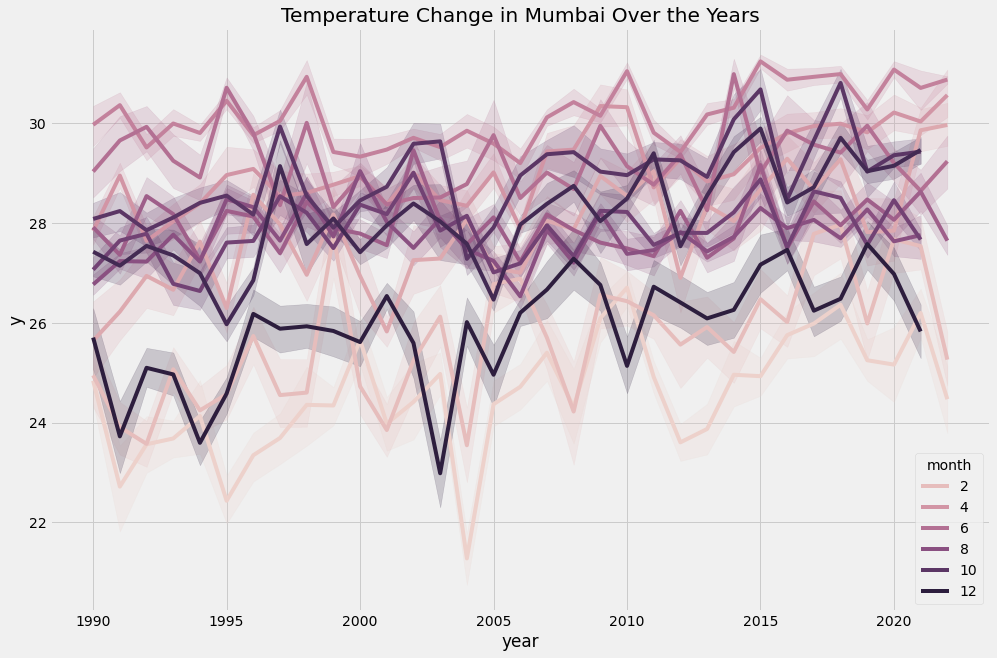

In [16]:
#Plotting the graph of how temperature changes over the years in Mumbai
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Mumbai Over the Years")
sns.lineplot(data = df, x='year', y='y', hue='month')
plt.show()

In [17]:
#Training and Plotting data using Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(df)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

23:25:36 - cmdstanpy - INFO - Chain [1] start processing
23:25:37 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
#Performing cross validation using three parameters [initial, period, horizon]
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='6000 days', period='180 days', horizon = '365 days')

  0%|          | 0/31 [00:00<?, ?it/s]

23:25:47 - cmdstanpy - INFO - Chain [1] start processing
23:25:48 - cmdstanpy - INFO - Chain [1] done processing
23:25:48 - cmdstanpy - INFO - Chain [1] start processing
23:25:49 - cmdstanpy - INFO - Chain [1] done processing
23:25:49 - cmdstanpy - INFO - Chain [1] start processing
23:25:50 - cmdstanpy - INFO - Chain [1] done processing
23:25:50 - cmdstanpy - INFO - Chain [1] start processing
23:25:51 - cmdstanpy - INFO - Chain [1] done processing
23:25:52 - cmdstanpy - INFO - Chain [1] start processing
23:25:53 - cmdstanpy - INFO - Chain [1] done processing
23:25:54 - cmdstanpy - INFO - Chain [1] start processing
23:25:55 - cmdstanpy - INFO - Chain [1] done processing
23:25:55 - cmdstanpy - INFO - Chain [1] start processing
23:25:56 - cmdstanpy - INFO - Chain [1] done processing
23:25:57 - cmdstanpy - INFO - Chain [1] start processing
23:25:58 - cmdstanpy - INFO - Chain [1] done processing
23:25:58 - cmdstanpy - INFO - Chain [1] start processing
23:25:59 - cmdstanpy - INFO - Chain [1]

In [19]:
#Cutoffs are used to determine the performance
cutoffs = pd.to_datetime(['2014-02-15', '2014-08-15', '2015-02-15'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

23:26:47 - cmdstanpy - INFO - Chain [1] start processing
23:26:49 - cmdstanpy - INFO - Chain [1] done processing
23:26:49 - cmdstanpy - INFO - Chain [1] start processing
23:26:50 - cmdstanpy - INFO - Chain [1] done processing
23:26:51 - cmdstanpy - INFO - Chain [1] start processing
23:26:52 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
#Displaying the performance metrics
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon       mse      rmse       mae      mape     mdape     smape  \
0 37 days  1.963344  1.401194  1.071503  0.037725  0.028810  0.037753   
1 38 days  1.924082  1.387113  1.065813  0.037432  0.028758  0.037483   
2 39 days  1.893137  1.375913  1.059838  0.037142  0.028758  0.037209   
3 40 days  1.877805  1.370330  1.057297  0.037016  0.028835  0.037082   
4 41 days  1.866181  1.366082  1.055427  0.036918  0.028920  0.036984   

   coverage  
0  0.800262  
1  0.803371  
2  0.805567  
3  0.809104  
4  0.811329

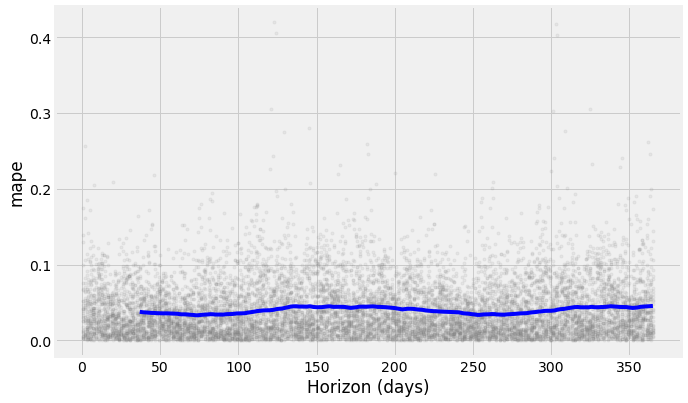

In [21]:
#Displaying the MAPE line with all the data points
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')